## ZADANIE 3: PREDYKCJA WYSTĄPIENIA WSTRZĄSÓW

Zaprezentujemy poniżej pomysł na ugryzienie zagadnienia przedstawionego w zadaniu 3 podczas hackathonu CuValley!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


kghm_dane = pd.read_excel('2016-2020.xlsx')
kghm_dane

,NR,DATA,GODZ,MIN,SEK,ENG,X,Y,Z,REJON,ODDZIAL,POLE,TYP,UWAGI
0,1,2016.01.01,1,0,24,30,0,0,0,RG,G-2,RU-XVII/2,SL,NaN
1,2,2016.01.01,1,32,59,70,0,0,0,RZ,G-17,RU-XV/1,SL,NaN
2,3,2016.01.01,1,42,44,90,0,0,0,RZ,G-15,RU-XV/3,SL,NaN
3,4,2016.01.01,3,23,47,40,0,0,0,RG,G-3,G-1/7,SL,NaN
4,5,2016.01.01,3,23,48,40,0,0,0,RG,G-3,G-1/7,SL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94175,26133,2020.12.31,19,6,12,40,0,0,0,RP,G-28,GL-XXIX/1,SL,NaN
94176,26134,2020.12.31,19,28,8,30,0,0,0,RG,G-7,RU-XIV/3,SL,NaN
94177,26135,2020.12.31,21,22,17,40,0,0,0,RP,G-24,RU-XXIII/6,SL,NaN
94178,26136,2020.12.31,21,38,1,30,0,0,0,RG,G-7,RU-XIV/3,SL,NaN


### 1. EDA - explanatory data analysis

Na początku prosta analiza danych i zrozumienie zależności! Postanowiliśmy do tego podejść w formie pytań, na które chcemy odpowiedzieć.



#### 1. Jaki jest udział poszczególnych rejonów w całych danych?

In [5]:
kghm_dane[['NR', 'REJON']].groupby(by = ['REJON']).count()

,NR
REJON,
RG,57613
RP,10519
RZ,26048


<AxesSubplot:xlabel='REJON'>

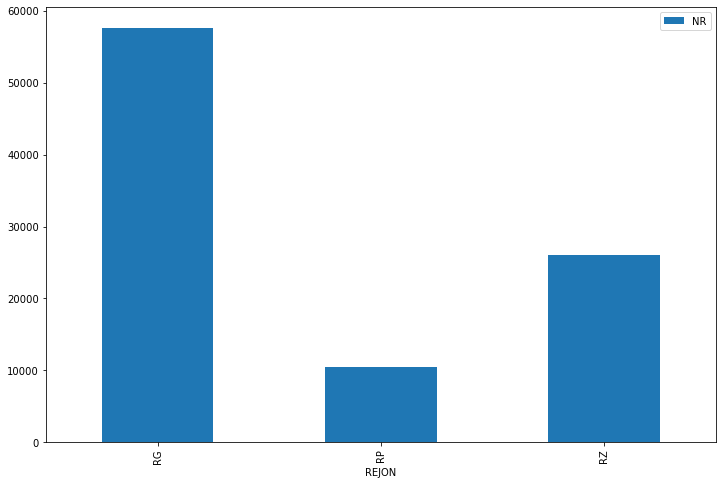

In [3]:
kghm_dane[['NR', 'REJON']].groupby(by = ['REJON']).count().plot.bar(figsize = (12,8))#.mean()

#### 2. Jaki jest oddział poszczególnych oddziałów w całych danych?

In [13]:
kghm_dane[['NR', 'ODDZIAL']].groupby(by = ['ODDZIAL']).count().sort_values(by = 'NR', ascending = False).head(20)

,NR
ODDZIAL,
G-1,19679
G-7,17934
G-11,12860
G-2,12597
G-3,7265
G-15,4291
G-17,3687
G-24,3429
G-14,2623


<AxesSubplot:xlabel='ODDZIAL'>

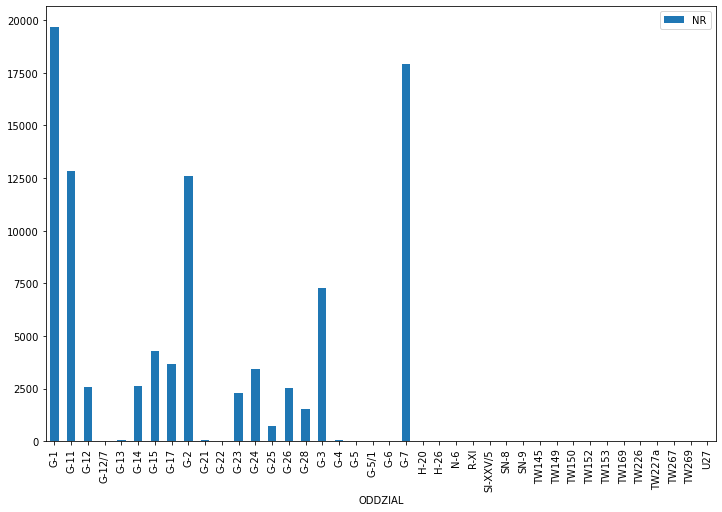

In [4]:
kghm_dane[['NR', 'ODDZIAL']].groupby(by = ['ODDZIAL']).count().plot.bar(figsize = (12,8))#.mean()

#### 3. Jaki jest stosunek typów wstrząsów w całych danych?

In [14]:
kghm_dane[['NR', 'TYP']].groupby(by = ['TYP']).count()

,NR
TYP,
0,1
O,34
SL,82575
T,10
W,11560


<AxesSubplot:xlabel='TYP'>

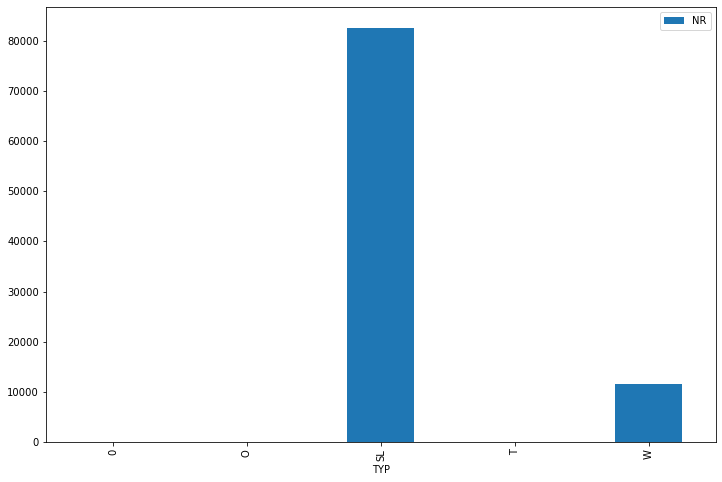

In [15]:
kghm_dane[['NR', 'TYP']].groupby(by = ['TYP']).count().plot.bar(figsize = (12,8))#.mean()

Wnioski: Powinniśmy analizować also występowanie śladowych wstrząsów, albo dużych wstrząsów!

In [17]:
kghm_dane[['NR', 'TYP', 'ODDZIAL']].groupby(by = ['TYP', 'ODDZIAL']).count().sort_values(by = 'NR', ascending = False).head(20)

NR
TYP ODDZIAL       
SL  G-1      17674
    G-7      16335
    G-2      11387
    G-11     11323
    G-3       5760
    G-15      3157
    G-17      3096
    G-24      2986
    G-12      2316
    G-26      2288
    G-14      2279
W   G-1       2002
SL  G-23      1940
W   G-7       1591
    G-11      1533
    G-3       1502
SL  G-28      1353
W   G-2       1203
    G-15      1132
    G-17       589

In [19]:
kghm_dane[['NR', 'TYP', 'REJON']].groupby(by = ['TYP', 'REJON']).count().sort_values(by = 'NR', ascending = False).head(20)

NR
TYP REJON       
SL  RG     51255
    RZ     22164
    RP      9156
W   RG      6337
    RZ      3867
    RP      1356
O   RG        16
    RZ        13
    RP         5
T   RG         5
    RZ         3
    RP         2
0   RZ         1

## 2. Analiza zjawisk śladowych

Wykonamy analizę dla jednego z regionów, a mianowicie RG!

In [59]:
## SELECTING 1st REJON :)
kghm_rejon_RG= kghm_dane[kghm_dane['REJON'] == 'RG']
kghm_rejon_RG = kghm_rejon_RG[kghm_rejon_RG['TYP'] == 'SL']
kghm_rejon_RG = pd.get_dummies(kghm_rejon_RG, columns=['ODDZIAL', 'TYP'])
kghm_rejon_RG = kghm_rejon_RG.drop(columns = ['X', 'Y', 'Z', 'POLE', 'MIN', 'SEK', 'UWAGI', 'GODZ', 'NR', 'REJON'])
kghm_rejon_RG['YEAR'] = kghm_rejon_RG['DATA'].apply(lambda x: x[0:4])
kghm_rejon_RG['MONTH'] = kghm_rejon_RG['DATA'].apply(lambda x: x[5:7])
kghm_rejon_RG['DAY'] = kghm_rejon_RG['DATA'].apply(lambda x: x[8:10])
kghm_rejon_RG.head()

,DATA,ENG,ODDZIAL_G-1,ODDZIAL_G-11,ODDZIAL_G-12,ODDZIAL_G-13,ODDZIAL_G-15,ODDZIAL_G-2,ODDZIAL_G-3,ODDZIAL_G-4,ODDZIAL_G-5/1,ODDZIAL_G-7,TYP_SL,YEAR,MONTH,DAY
0,2016.01.01,30,0,0,0,0,0,1,0,0,0,0,1,2016,01,01
3,2016.01.01,40,0,0,0,0,0,0,1,0,0,0,1,2016,01,01
4,2016.01.01,40,0,0,0,0,0,0,1,0,0,0,1,2016,01,01
5,2016.01.01,40,0,0,0,0,0,0,0,0,0,1,1,2016,01,01
6,2016.01.01,30,0,0,0,0,0,1,0,0,0,0,1,2016,01,01


In [60]:
q1 = kghm_rejon_RG['ENG'].quantile(0.05)
q2 = kghm_rejon_RG['ENG'].quantile(0.90)


kghm_rejon_RG = kghm_rejon_RG[(kghm_rejon_RG['ENG'] < q2) & (kghm_rejon_RG['ENG'] > q1)]
kghm_rejon_RG['ENG'].describe()

count    34958.000000
mean        50.855684
std         12.632804
min         33.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         80.000000
Name: ENG, dtype: float64

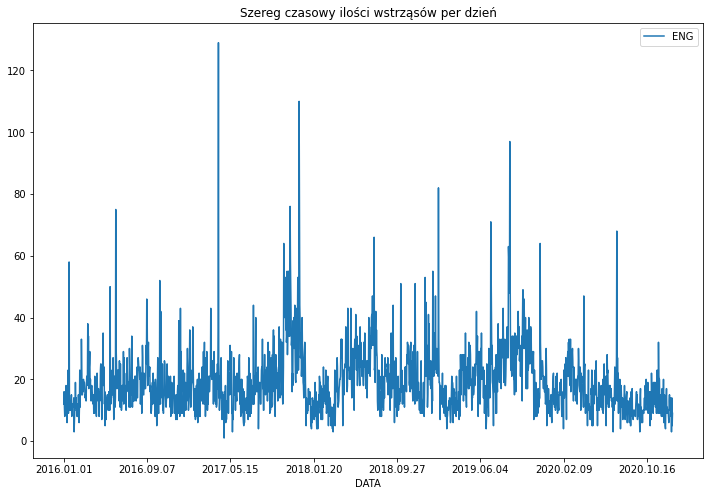

In [61]:
kghm_dane_date_2 = kghm_rejon_RG
time_series = kghm_dane_date_2[['ENG','DATA']].groupby(by = ['DATA']).count()#.reset_index()
time_series.plot(figsize = (12,8))
plt.title('Szereg czasowy ilości wstrząsów per dzień')
plt.show()

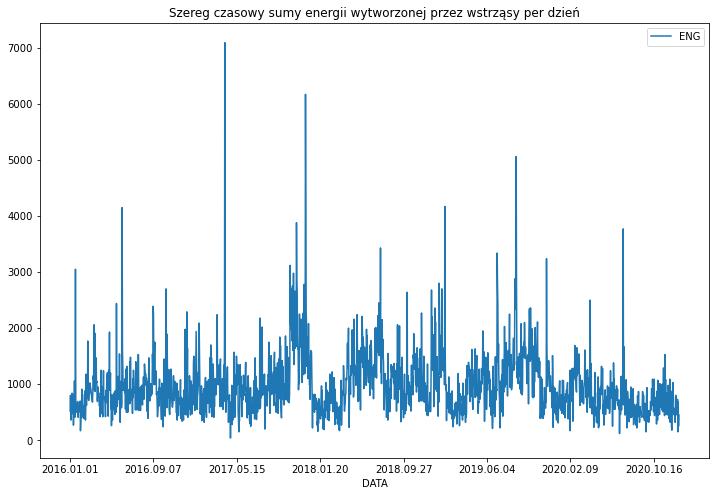

In [62]:
kghm_dane_date_2 = kghm_rejon_RG
time_series = kghm_dane_date_2[['ENG','DATA']].groupby(by = ['DATA']).sum()#.reset_index()
time_series.plot(figsize = (12,8))
plt.title('Szereg czasowy sumy energii wytworzonej przez wstrząsy per dzień')
plt.show()

In [63]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Split the data into training and testing sets
train, test = train_test_split(kghm_rejon_RG, test_size = 0.1, random_state = 42)

train_features = train.drop(columns = ['DATA', 'ENG'])
train_labels = train['ENG']


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10000, random_state = 42, max_depth = 5)
# Train the model on training data
rf.fit(train_features, train_labels)

test_features = test.drop(columns = ['DATA', 'ENG'])
test_labels = test['ENG']


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 10.15


Teraz wykonamy tę analizę, dla jednego oddziału!
Oddziału: G-1

In [67]:
## SELECTING 1st REJON :)
kghm_rejon_RG= kghm_dane[kghm_dane['ODDZIAL'] == 'G-1']
kghm_rejon_RG = kghm_rejon_RG[kghm_rejon_RG['TYP'] == 'SL']
kghm_rejon_RG = pd.get_dummies(kghm_rejon_RG, columns=['ODDZIAL', 'TYP'])
kghm_rejon_RG = kghm_rejon_RG.drop(columns = ['X', 'Y', 'Z', 'POLE', 'MIN', 'SEK', 'UWAGI', 'GODZ', 'NR', 'REJON'])
kghm_rejon_RG['YEAR'] = kghm_rejon_RG['DATA'].apply(lambda x: x[0:4])
kghm_rejon_RG['MONTH'] = kghm_rejon_RG['DATA'].apply(lambda x: x[5:7])
kghm_rejon_RG['DAY'] = kghm_rejon_RG['DATA'].apply(lambda x: x[8:10])
kghm_rejon_RG.head()

,DATA,ENG,ODDZIAL_G-1,TYP_SL,YEAR,MONTH,DAY
51,2016.01.02,70,1,1,2016,01,02
72,2016.01.03,40,1,1,2016,01,03
80,2016.01.03,360,1,1,2016,01,03
83,2016.01.03,60,1,1,2016,01,03
156,2016.01.05,930,1,1,2016,01,05


In [68]:
q1 = kghm_rejon_RG['ENG'].quantile(0.05)
q2 = kghm_rejon_RG['ENG'].quantile(0.90)

kghm_rejon_RG = kghm_rejon_RG[(kghm_rejon_RG['ENG'] < q2) & (kghm_rejon_RG['ENG'] > q1)]
kghm_rejon_RG['ENG'].describe()

count    13614.000000
mean        54.153665
std         16.349504
min         40.000000
25%         40.000000
50%         50.000000
75%         60.000000
max        170.000000
Name: ENG, dtype: float64

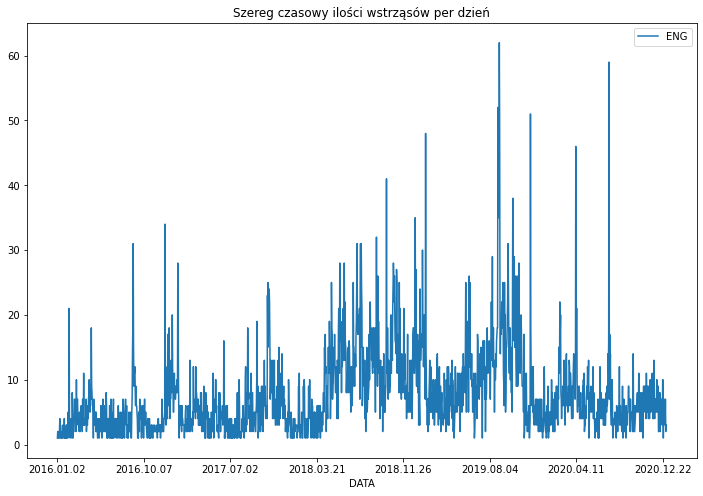

In [69]:
kghm_dane_date_2 = kghm_rejon_RG
time_series = kghm_dane_date_2[['ENG','DATA']].groupby(by = ['DATA']).count()#.reset_index()
time_series.plot(figsize = (12,8))
plt.title('Szereg czasowy ilości wstrząsów per dzień')
plt.show()

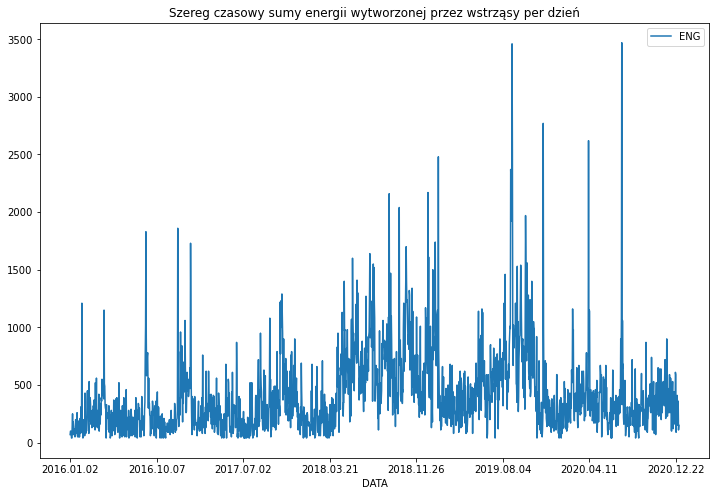

In [70]:
kghm_dane_date_2 = kghm_rejon_RG
time_series = kghm_dane_date_2[['ENG','DATA']].groupby(by = ['DATA']).sum()#.reset_index()
time_series.plot(figsize = (12,8))
plt.title('Szereg czasowy sumy energii wytworzonej przez wstrząsy per dzień')
plt.show()

In [71]:
kghm_rejon_RG

,DATA,ENG,ODDZIAL_G-1,TYP_SL,YEAR,MONTH,DAY
51,2016.01.02,70,1,1,2016,01,02
72,2016.01.03,40,1,1,2016,01,03
83,2016.01.03,60,1,1,2016,01,03
414,2016.01.11,50,1,1,2016,01,11
430,2016.01.11,50,1,1,2016,01,11
...,...,...,...,...,...,...,...
94129,2020.12.30,60,1,1,2020,12,30
94147,2020.12.30,50,1,1,2020,12,30
94149,2020.12.31,40,1,1,2020,12,31
94161,2020.12.31,40,1,1,2020,12,31


In [72]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Split the data into training and testing sets
train, test = train_test_split(kghm_rejon_RG, test_size = 0.25, random_state = 42)

train_features = train.drop(columns = ['DATA', 'ENG'])
train_labels = train['ENG']


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42, max_depth = 5)
# Train the model on training data
rf.fit(train_features, train_labels)

test_features = test.drop(columns = ['DATA', 'ENG'])
test_labels = test['ENG']


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 12.21


In [120]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into training and testing sets
train, test = train_test_split(kghm_rejon_RG, test_size = 0.25, random_state = 42)

train_features = train.drop(columns = ['DATA', 'ENG'])
train_labels = train['ENG']

model = GradientBoostingRegressor(n_estimators  = 500, criterion = 'mae')

# Train the model on training data
model.fit(train_features, train_labels)

test_features = test.drop(columns = ['DATA', 'ENG'])
test_labels = test['ENG']

# Use the forest's predict method on the test data
predictions = model.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3010.91


Wnioski: bazując tylko na danych datowych ciężko przewidzieć wstrząsy :(

In [113]:
## SELECTING 1st REJON :)
kghm_rejon_RG= kghm_dane[kghm_dane['REJON'] == 'RG']
kghm_rejon_RG = kghm_rejon_RG[kghm_rejon_RG['TYP'] == 'W']
kghm_rejon_RG = pd.get_dummies(kghm_rejon_RG, columns=['ODDZIAL', 'TYP'])
kghm_rejon_RG = kghm_rejon_RG.drop(columns = ['X', 'Y', 'Z', 'POLE', 'MIN', 'SEK', 'UWAGI', 'GODZ', 'NR', 'REJON'])
kghm_rejon_RG['YEAR'] = kghm_rejon_RG['DATA'].apply(lambda x: x[0:4])
kghm_rejon_RG['MONTH'] = kghm_rejon_RG['DATA'].apply(lambda x: x[5:7])
kghm_rejon_RG['DAY'] = kghm_rejon_RG['DATA'].apply(lambda x: x[8:10])
kghm_rejon_RG#.head()

,DATA,ENG,ODDZIAL_G-1,ODDZIAL_G-13,ODDZIAL_G-15,ODDZIAL_G-2,ODDZIAL_G-3,ODDZIAL_G-4,ODDZIAL_G-6,ODDZIAL_G-7,ODDZIAL_TW226,ODDZIAL_TW227a,TYP_W,YEAR,MONTH,DAY
8,2016.01.01,9300,0,0,0,0,0,0,0,1,0,0,1,2016,01,01
49,2016.01.02,8600,1,0,0,0,0,0,0,0,0,0,1,2016,01,02
81,2016.01.03,1200,0,0,0,0,1,0,0,0,0,0,1,2016,01,03
88,2016.01.03,4000,0,0,0,0,1,0,0,0,0,0,1,2016,01,03
99,2016.01.04,8500,1,0,0,0,0,0,0,0,0,0,1,2016,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94070,2020.12.28,1400,1,0,0,0,0,0,0,0,0,0,1,2020,12,28
94086,2020.12.28,8600,0,0,0,0,1,0,0,0,0,0,1,2020,12,28
94092,2020.12.29,270000,0,0,0,1,0,0,0,0,0,0,1,2020,12,29
94117,2020.12.29,2400,0,0,0,1,0,0,0,0,0,0,1,2020,12,29


In [114]:
q1 = kghm_rejon_RG['ENG'].quantile(0.05)
q2 = kghm_rejon_RG['ENG'].quantile(0.90)


kghm_rejon_RG = kghm_rejon_RG[(kghm_rejon_RG['ENG'] < q2) & (kghm_rejon_RG['ENG'] > q1)]
kghm_rejon_RG['ENG'].describe()

count     5325.000000
mean     10662.497653
std      14823.362938
min       1400.000000
25%       2500.000000
50%       4700.000000
75%      11000.000000
max      83000.000000
Name: ENG, dtype: float64

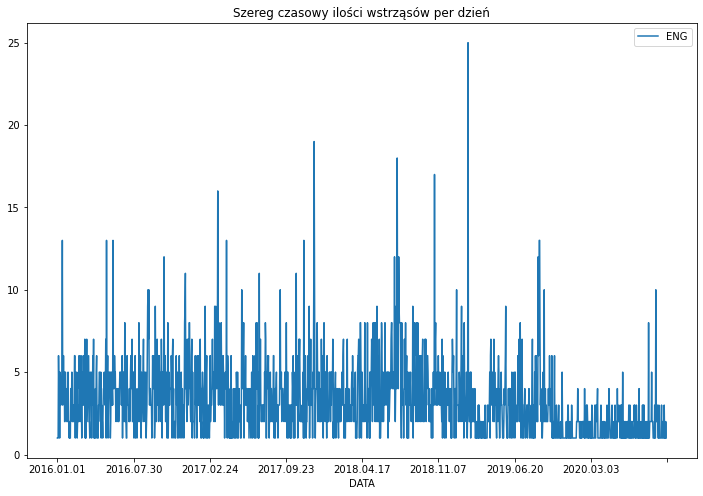

In [115]:
kghm_dane_date_2 = kghm_rejon_RG
time_series = kghm_dane_date_2[['ENG','DATA']].groupby(by = ['DATA']).count()#.reset_index()
time_series.plot(figsize = (12,8))
plt.title('Szereg czasowy ilości wstrząsów per dzień')
plt.show()

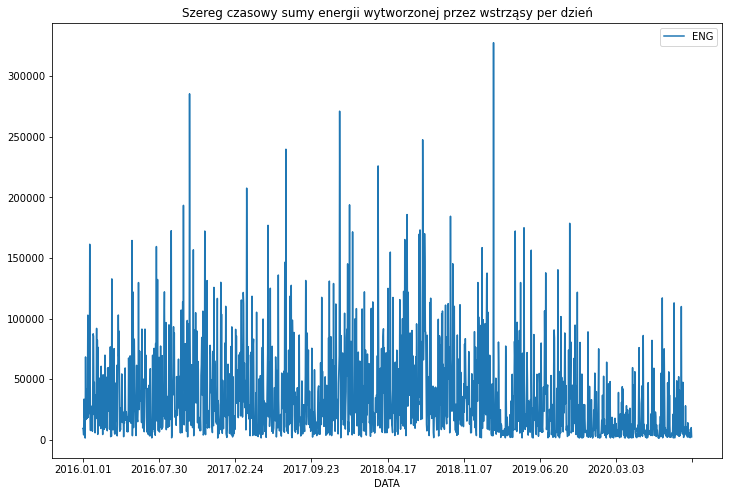

In [116]:
kghm_dane_date_2 = kghm_rejon_RG
time_series = kghm_dane_date_2[['ENG','DATA']].groupby(by = ['DATA']).sum()#.reset_index()
time_series.plot(figsize = (12,8))
plt.title('Szereg czasowy sumy energii wytworzonej przez wstrząsy per dzień')
plt.show()

In [117]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Split the data into training and testing sets
train, test = train_test_split(kghm_rejon_RG, test_size = 0.1, random_state = 42)

train_features = train.drop(columns = ['DATA', 'ENG'])
train_labels = train['ENG']


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10000, random_state = 42, max_depth = 5)
# Train the model on training data
rf.fit(train_features, train_labels)

test_features = test.drop(columns = ['DATA', 'ENG'])
test_labels = test['ENG']


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 9373.47


In [118]:
## SELECTING 1st REJON :)
kghm_rejon_RG= kghm_dane[kghm_dane['ODDZIAL'] == 'G-1']
kghm_rejon_RG = kghm_rejon_RG[kghm_rejon_RG['TYP'] == 'W']
kghm_rejon_RG = pd.get_dummies(kghm_rejon_RG, columns=['ODDZIAL', 'TYP'])
kghm_rejon_RG = kghm_rejon_RG.drop(columns = ['X', 'Y', 'Z', 'POLE', 'MIN', 'SEK', 'GODZ', 'NR', 'REJON'])
kghm_rejon_RG['YEAR'] = kghm_rejon_RG['DATA'].apply(lambda x: x[0:4])
kghm_rejon_RG['MONTH'] = kghm_rejon_RG['DATA'].apply(lambda x: x[5:7])
kghm_rejon_RG['DAY'] = kghm_rejon_RG['DATA'].apply(lambda x: x[8:10])
kghm_rejon_RG['FRONT'] = kghm_rejon_RG['UWAGI'].apply(lambda x: 1 if 'F' in str(x) else 0)
kghm_rejon_RG['PRZODKI'] = kghm_rejon_RG['UWAGI'].apply(lambda x: 1 if 'PP' in str(x) else 0)
kghm_rejon_RG['CALIZNA'] = kghm_rejon_RG['UWAGI'].apply(lambda x: 1 if 'C' in str(x).replace('CW','') else 0)
kghm_rejon_RG = kghm_rejon_RG.drop(columns = 'UWAGI')
kghm_rejon_RG
#.head()

,DATA,ENG,ODDZIAL_G-1,TYP_W,YEAR,MONTH,DAY,FRONT,PRZODKI,CALIZNA
49,2016.01.02,8600,1,1,2016,01,02,0,0,0
99,2016.01.04,8500,1,1,2016,01,04,0,1,0
110,2016.01.04,6800,1,1,2016,01,04,0,1,0
148,2016.01.05,1900,1,1,2016,01,05,1,0,0
183,2016.01.06,1700,1,1,2016,01,06,0,0,1
...,...,...,...,...,...,...,...,...,...,...
93872,2020.12.20,1700,1,1,2020,12,20,1,0,0
93895,2020.12.21,2000,1,1,2020,12,21,1,0,0
93967,2020.12.24,1200,1,1,2020,12,24,1,1,0
94070,2020.12.28,1400,1,1,2020,12,28,1,0,0


In [119]:
q1 = kghm_rejon_RG['ENG'].quantile(0.10)
q2 = kghm_rejon_RG['ENG'].quantile(0.85)


kghm_rejon_RG = kghm_rejon_RG[(kghm_rejon_RG['ENG'] < q2) & (kghm_rejon_RG['ENG'] > q1)]
kghm_rejon_RG['ENG'].describe()

count     1487.000000
mean      5334.700740
std       4345.568235
min       1500.000000
25%       2400.000000
50%       3600.000000
75%       6600.000000
max      22000.000000
Name: ENG, dtype: float64

In [107]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Split the data into training and testing sets
train, test = train_test_split(kghm_rejon_RG, test_size = 0.2, random_state = 42)

train_features = train.drop(columns = ['DATA', 'ENG'])
train_labels = train['ENG']


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth = 8)
# Train the model on training data
rf.fit(train_features, train_labels)

test_features = test.drop(columns = ['DATA', 'ENG'])
test_labels = test['ENG']


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 5933.68


In [ ]:
kghm_dane[kghm_dane['TYP'] != 'SL']